In [167]:
import pandas as pd # for data file reading
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


In [168]:
# teams = pd.read_cvs("men-olympics.txt")
# Load the data
#years = np.loadtxt("men-olympics-100.txt")

# Read the data into a numpy array
raw = np.genfromtxt("men-olympics-100.txt", delimiter="")

train, test = train_test_split(raw, test_size=.2, random_state=1)
# Set the predictions

#predictor = raw[:,0] # here olympic years (get all elements in 1.row arr[0,:]; all elements in the 1. col: arr[:,0]
#target = raw[:,1]    #"winning_times"

# Split the data into the train (80%) and test (20%) sets


# Matrix X as a train data (predictor) and matrix y as a target matrix (target)
X = train[:,0]      # elements of the 0. column (years)
y= train[:,1]       # elements of the 1. column (winning times)
print("X", X)
print("y", y)

X [1984. 1988. 1908. 1904. 1992. 1920. 1980. 1956. 1924. 2000. 1900. 1968.
 1896. 1964. 2008. 2004. 1932. 1928. 1952. 1948. 1912.]
y [ 9.99  9.92 10.8  11.    9.96 10.8  10.25 10.5  10.6   9.87 11.    9.95
 12.   10.    9.69  9.85 10.3  10.8  10.4  10.3  10.8 ]


In [169]:
# Calculate x_mean and standard deviaiton for the predictor columns (here one column - years)
X_mean = X.mean()
X_std = X.std()         #It is important to note that the standard deviation calculated by numpy is the population standard deviation, if you would like to calculate the sample standard deviation, you can set the ddof argument to 1 for np.std() or use X.std(ddof=1)
print("X_mean %d and X_std %d" % (X_mean, X_std))

X_mean 1950 and X_std 36


In [170]:
# Standardize the data in the 0.col (years)
X = (X -X_mean) / X_std
print(X)
# for element in X.tolist():
#    print(element)


[ 0.91228354  1.02238673 -1.17967699 -1.28978018  1.13248991 -0.84936743
  0.80218035  0.14156124 -0.73926425  1.35269628 -1.39988336  0.4718708
 -1.50998655  0.36176761  1.57290265  1.46279947 -0.51905788 -0.62916106
  0.03145805 -0.07864513 -1.06957381]


In [171]:
# Add the intercept to X (append ones)
X = np.array(X).reshape((len(X), -1))
ones = np.ones((X.shape[0], 1))                                         # X = X.reshape(-1, 1) - reshape a 1D array X to a 2D-array (the array X to have 1 column and as many rows as needed to fit all the elements.)
X = np.append(ones, X, axis=1)    #we want to append the values along the first axis (rows), so we set axis=1. This should reshape your 1D array to have 2 dimensions and concatenate the ones array to the left of the X array
print(X)    #print(X.shape[0] - number of rows, print(X.shape[1] - nr of columns


[[ 1.          0.91228354]
 [ 1.          1.02238673]
 [ 1.         -1.17967699]
 [ 1.         -1.28978018]
 [ 1.          1.13248991]
 [ 1.         -0.84936743]
 [ 1.          0.80218035]
 [ 1.          0.14156124]
 [ 1.         -0.73926425]
 [ 1.          1.35269628]
 [ 1.         -1.39988336]
 [ 1.          0.4718708 ]
 [ 1.         -1.50998655]
 [ 1.          0.36176761]
 [ 1.          1.57290265]
 [ 1.          1.46279947]
 [ 1.         -0.51905788]
 [ 1.         -0.62916106]
 [ 1.          0.03145805]
 [ 1.         -0.07864513]
 [ 1.         -1.06957381]]


In [172]:
# Define the polynomial transformation
poly = PolynomialFeatures(degree=4)
X = poly.fit_transform(X)

In [173]:
# Print X transpose

for element in X.T.tolist():
    print(element)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9122835396978074, 1.022386725523405, -1.179676990988546, -1.2897801768141437, 1.1324899113490026, -0.8493674335117534, 0.8021803538722099, 0.14156123891862452, -0.7392642476861558, 1.3526962830001976, -1.3998833626397411, 0.4718707963954172, -1.5099865484653388, 0.3617676105698196, 1.5729026546513927, 1.462799468825795, -0.5190578760349608, -0.6291610618605583, 0.031458053093026975, -0.07864513273257057, -1.0695738051629484]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9122835396978074, 1.022386725523405, -1.179676990988546, -1.2897801768141437, 1.1324899113490026, -0.8493674335117534, 0.8021803538722099, 0.14156123891862452, -0.7392642476861558, 1.3526962830001976, -1.3998833626397411, 0.4718707963954172, -1.50

In [174]:
# Generate an array of "alpha" values which is our lamda vals
alpha_vals = np.logspace(-8, 0, 100, base=10)   # start -8, end 0, 100 vals
print(alpha_vals)

[1.00000000e-08 1.20450354e-08 1.45082878e-08 1.74752840e-08
 2.10490414e-08 2.53536449e-08 3.05385551e-08 3.67837977e-08
 4.43062146e-08 5.33669923e-08 6.42807312e-08 7.74263683e-08
 9.32603347e-08 1.12332403e-07 1.35304777e-07 1.62975083e-07
 1.96304065e-07 2.36448941e-07 2.84803587e-07 3.43046929e-07
 4.13201240e-07 4.97702356e-07 5.99484250e-07 7.22080902e-07
 8.69749003e-07 1.04761575e-06 1.26185688e-06 1.51991108e-06
 1.83073828e-06 2.20513074e-06 2.65608778e-06 3.19926714e-06
 3.85352859e-06 4.64158883e-06 5.59081018e-06 6.73415066e-06
 8.11130831e-06 9.77009957e-06 1.17681195e-05 1.41747416e-05
 1.70735265e-05 2.05651231e-05 2.47707636e-05 2.98364724e-05
 3.59381366e-05 4.32876128e-05 5.21400829e-05 6.28029144e-05
 7.56463328e-05 9.11162756e-05 1.09749877e-04 1.32194115e-04
 1.59228279e-04 1.91791026e-04 2.31012970e-04 2.78255940e-04
 3.35160265e-04 4.03701726e-04 4.86260158e-04 5.85702082e-04
 7.05480231e-04 8.49753436e-04 1.02353102e-03 1.23284674e-03
 1.48496826e-03 1.788649

In [175]:
# Create an Identity matrix for X and set the top left element to 0

I = np.identity(X.shape[1])
I[0][0] = 0
print(I)
 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [176]:
# Calculate the penalty matrix 
penalty = alpha_vals[0] * I # alpha = 1
print(penalty)

[[0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-08 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-08 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-08 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-08 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-08 0.e+00 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-08 0.e+00 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-08 0.e+00 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-08 0.e+00
  0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0

In [177]:
# Calculate the coefficients w_hat
w_hat = np.linalg.inv(X.T @ X + penalty) @ X.T @ y
print(w_hat)    # ["intercept-w", "years-w"]

[ 5.11438792e+02  3.31569762e+03 -1.40395844e+02 -3.81678755e+03
  1.51691249e+02 -2.68429760e+00  1.71556152e-06 -1.14707371e+01
  2.60193044e+00 -8.06800549e-02  0.00000000e+00 -5.84436742e-02
 -4.11829069e-02 -8.06800545e-02  1.22854298e-01]


In [178]:
# To make predictions, we need to do the same with the test set ("winning_times")
test_X = test[:,0] 

# Scale the set by using the mean & std of the training set
test_X = (test_X - X_mean) / X_std

test_X = np.array(test_X).reshape((len(test_X), -1))
ones = np.ones((test_X.shape[0], 1))                                         # X = X.reshape(-1, 1) - reshape a 1D array X to a 2D-array (the array X to have 1 column and as many rows as needed to fit all the elements.)
test_X = np.append(ones, test_X, axis=1)    #we want to append the values along the first axis (rows), so we set axis=1. This should reshape your 1D array to have 2 dimensions and concatenate the ones array to the left of the X array

# Define the polynomial transformation
poly = PolynomialFeatures(degree=4)
test_X = poly.fit_transform(test_X)

print(test_X) 

[[ 1.          1.          0.58197398  1.          0.58197398  0.33869372
   1.          0.58197398  0.33869372  0.19711093  1.          0.58197398
   0.33869372  0.19711093  0.11471343]
 [ 1.          1.          0.25166442  1.          0.25166442  0.06333498
   1.          0.25166442  0.06333498  0.01593916  1.          0.25166442
   0.06333498  0.01593916  0.00401132]
 [ 1.          1.          0.69207717  1.          0.69207717  0.47897081
   1.          0.69207717  0.47897081  0.33148476  1.          0.69207717
   0.47897081  0.33148476  0.22941303]
 [ 1.          1.         -1.23472858  1.         -1.23472858  1.52455468
   1.         -1.23472858  1.52455468 -1.88241124  1.         -1.23472858
   1.52455468 -1.88241124  2.32426696]
 [ 1.          1.          1.2425931   1.          1.2425931   1.54403761
   1.          1.2425931   1.54403761  1.91861047  1.          1.2425931
   1.54403761  1.91861047  2.38405213]
 [ 1.          1.         -0.40895469  1.         -0.40895469  0.1

In [179]:
# Calculate predictions for the winning times
predictions = test_X @ w_hat
print(predictions)

[10.15325517 10.28012786 10.10259321 11.03844842  9.85091463 10.43827846]


In [180]:
# Find the optimal alpha by defining the ridge regression model

def ridge_fit(train, predictor, target, alpha):
    X = train[:,0]  # predictor  
    y = train[:,1]  # target

    X_mean = X.mean()
    X_std = X.std()

    X = (X -X_mean) / X_std
    X = np.array(X).reshape((len(X), -1))
    ones = np.ones((X.shape[0], 1))                                         # X = X.reshape(-1, 1) - reshape a 1D array X to a 2D-array (the array X to have 1 column and as many rows as needed to fit all the elements.)
    X = np.append(ones, X, axis=1) 

    penalty = alpha * np.identity(X.shape[1])
    penalty[0][0] = 0 

    w_hat = np.linalg.inv(X.T @ X + penalty) @ X.T @ y

    return w_hat, X_mean, X_std
    

In [181]:
# Do the same on the test set
def ridge_predict(test, predictor, x_mean, x_std, w_hat):
    test_X = test[:,0]
    test_X = (test_X - X_mean) / X_std
    
    test_X = np.array(test_X).reshape((len(test_X), -1))
    ones = np.ones((test_X.shape[0], 1))                                         # X = X.reshape(-1, 1) - reshape a 1D array X to a 2D-array (the array X to have 1 column and as many rows as needed to fit all the elements.)
    test_X = np.append(ones, test_X, axis=1) 

    predictions = test_X @ w_hat
    return predictions

In [182]:
from sklearn.metrics import mean_absolute_error

errors = []
alphas = np.logspace(0, 1, 100, base=10) 

for alpha in alphas:
    w_hat, X_mean, X_std = ridge_fit(train, X, y, alpha)
    predictions = ridge_predict(test, X, X_mean, X_std, w_hat)
    errors.append(mean_absolute_error(test[:,1], predictions))  # a corresponding error for each aplha value
#print(errors)

# We pick the alpha where error is the lowest
# The higher the error, the more underfitted the regression model is
optimal_alpha = np.min(errors)
print("Optimal alpha {:.5f}".format(optimal_alpha))



Optimal alpha 0.11445


(array([10.41809524, -0.47969037]), 1950.857142857143, 36.32955731486248)
[10.41809524 -0.47709023]


<function matplotlib.pyplot.show(close=None, block=None)>

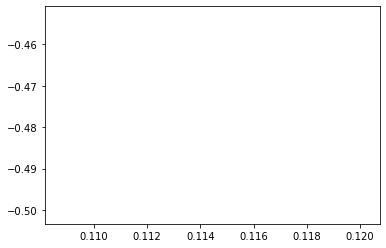

In [183]:
coefficients_alpha_0 = ridge_fit(train, X, y, 0)
print(coefficients_alpha_0)

result = ridge_fit(train, X, y, optimal_alpha)
coefficients_optimal_alpha = result[0]
print(coefficients_optimal_alpha)

#optimal_alpha = np.array([optimal_alpha]).reshape(-1, 1) # convert optimal_alpha to an array of shape (1,)
plt.plot(optimal_alpha, coefficients_optimal_alpha)
plt.show

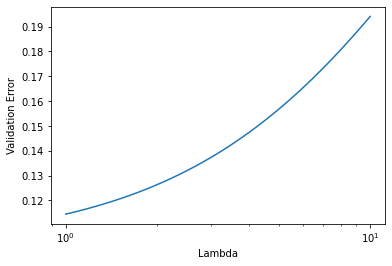

In [184]:
# Plot the validation errors as a function of lambda
plt.plot(alphas, errors)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Validation Error')
plt.show()


In [185]:
# Compare our model with the sklearn implementation
#from sklearn.linear_model import Ridge

#ridge = Ridge(alpha=alpha_vals)
#X = np.array(X).reshape((len(X), -1))
#ridge.fit(X[:,0], y)
#Ridge(alpha=alpha_vals)
#ridge.coef_


In [186]:
athlets = np. array([[151, 83], [69, 46], [198, 92], [75,35]])
mean_althlets = np.mean(athlets, axis=0)
standard_deviation_althlets = np.std(athlets, axis=0).tolist()
standard_deviation = np.std(athlets, axis=0)
print("Mean athlets %d" % mean_althlets[0].item())
print("Standard deviation athlets %d" % standard_deviation_althlets[0])
print("Mean events %d" % mean_althlets[1].item())
print("Standard deviation events %d" % standard_deviation_althlets[1])

# We standardize the values of the observations in the two columns()/for the two variables
standardized_data = []
for row in athlets:
    new_athlets = (row[0] - mean_althlets[0]) / standard_deviation_althlets[0]
    new_events = (row[1] - mean_althlets[1]) / standard_deviation_althlets[1]
    standardized_data.append([new_athlets, new_events])
standardized_data = np.array(standardized_data)
print("Standardized data, matrix X not prepended with ones:\n", standardized_data)

# Compute X^T * X, where X needs to be appended with a column of ones
ones = np.ones((standardized_data.shape[0], 1))
data_to_standardize = np.hstack((ones,standardized_data))
matrix_data = data_to_standardize.T @ data_to_standardize       # element for element multiplication: X^T * X
print("X^T * X:\n", matrix_data)

#standardized_athlets = np.array([])
#for row in athlets:
#    new_athlets = np.array((row[0] - mean_althlets[0]) / standard_deviation_althlets[0])
#    new_events = np.array((row[1] - mean_althlets[1]) / standard_deviation_althlets[1])
#    standardized_athlets.append([new_athlets, new_events])
# standardized_athlets = np.concatenate([new_athlets, new_events], axis=0)


#for i, item in enumerate(athlets):
#    for j, sub_item in enumerate(item):
#        new_val = (sub_item - mean_althlets[j]) / standard_deviation_althlets[j]
#        athlets[i][j] = new_val
#        print("Standardarzed value: {:.1f}".format(new_val))

# standardized_athlets = [[(sub_item - mean_althlets[j]) / standard_deviation_althlets[j] for j, sub_item in enumerate(item)] for i, item in enumerate(data_to_standardize)]




# matrix_data = np.cov(standardized_athlets, rowvar=False) //computes the covariance matrix


# Print the elements of the 2D array (matrix X)
#for i in range(matrix_data.shape[0]):
#    for j in range(matrix_data.shape[1]):
#            print(matrix_data[i][j], end=' ')
#    print()


#matrix_data = np.matmul(data_to_standardize.T, data_to_standardize)
# for i in range(matrix_data.shape[0]):
#     for j in range(matrix_data.shape[1]):
#         print(matrix_data[i][j], end=' ')
#     print()




Mean athlets 123
Standard deviation athlets 53
Mean events 64
Standard deviation events 24
Standardized data, matrix X not prepended with ones:
 [[ 0.51466717  0.79063786]
 [-1.00615113 -0.74902534]
 [ 1.38635571  1.16515053]
 [-0.89487175 -1.20676305]]
X^T * X:
 [[4.00000000e+00 0.00000000e+00 2.22044605e-16]
 [0.00000000e+00 4.00000000e+00 3.85575929e+00]
 [2.22044605e-16 3.85575929e+00 4.00000000e+00]]
